<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2_0_long_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from keras.optimizers import SGD, Adam

In [3]:
### Build the dataset
# This is a nonlinear AND long-distance dataset
# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

## Part 2: Build the Model

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.7821 - accuracy: 0.4992 - val_loss: 0.7084 - val_accuracy: 0.4844
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5144 - val_loss: 0.6954 - val_accuracy: 0.4988
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5092 - val_loss: 0.6942 - val_accuracy: 0.5128
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5180 - val_loss: 0.6957 - val_accuracy: 0.5068
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5132 - val_loss: 0.6947 - val_accuracy: 0.5144
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5208 - val_loss: 0.6937 - val_accuracy: 0.5132
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5076 - val_loss: 0.6949 - val_accuracy: 0.5136
Epoch 8/100
7

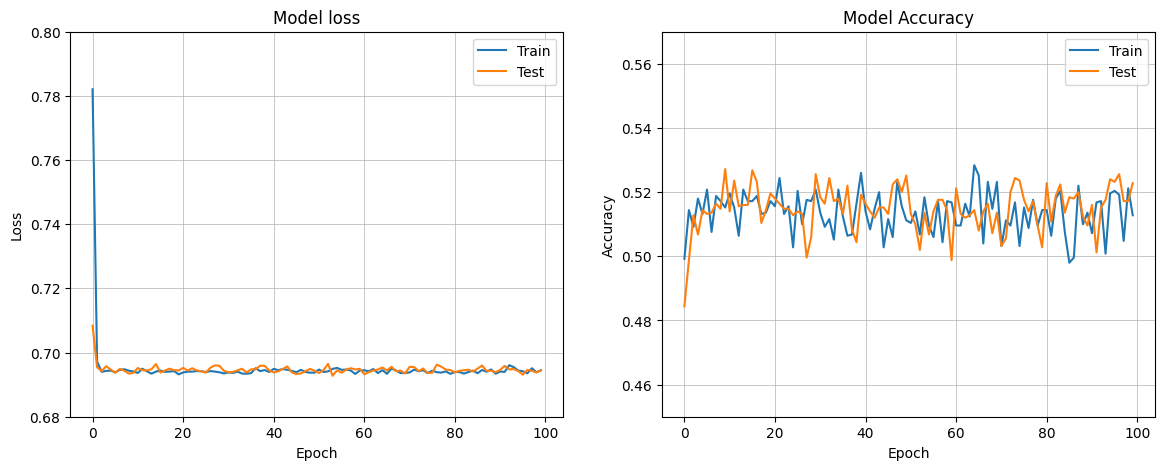

In [13]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(14,5))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0.68,0.8))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0.45,0.57))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss_accuracy(r, title=None)

In [15]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy']
  )

In [16]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6865 - accuracy: 0.5580 - val_loss: 0.6737 - val_accuracy: 0.6000
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6545 - accuracy: 0.6476 - val_loss: 0.6221 - val_accuracy: 0.7256
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5818 - accuracy: 0.7584 - val_loss: 0.5311 - val_accuracy: 0.8060
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4822 - accuracy: 0.8256 - val_loss: 0.4400 - val_accuracy: 0.8528
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4032 - accuracy: 0.8680 - val_loss: 0.3707 - val_accuracy: 0.8784
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3345 - accuracy: 0.8980 - val_loss: 0.3041 - val_accuracy: 0.9028
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.2733 - accuracy: 0.9164 - val_loss: 0.2676 - val_accuracy: 0.9156
Epoch 8/200
7

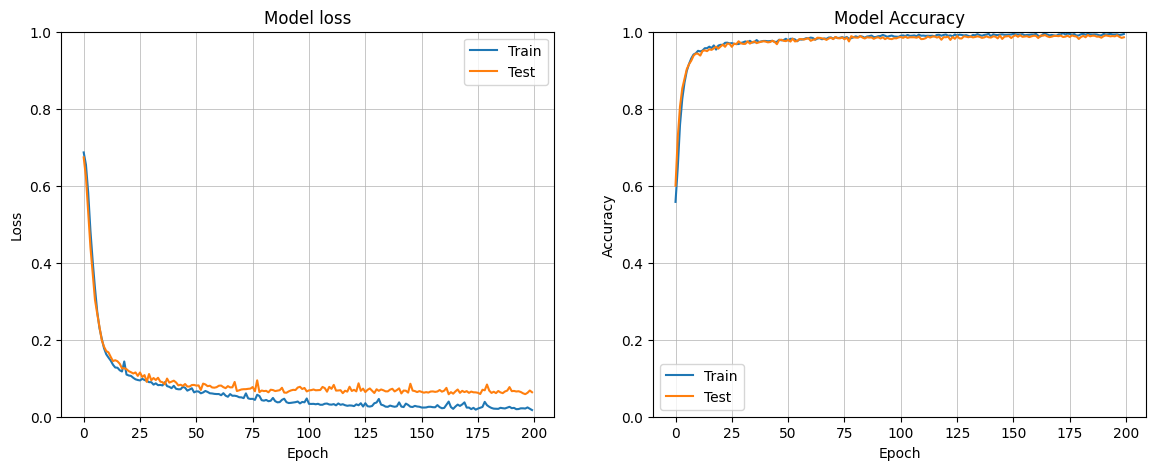

In [19]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(14,5))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,1))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss_accuracy(r, title=None)

In [20]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 5s 28ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6924 - val_accuracy: 0.4880
Epoch 2/200
79/79 [==============================] - 2s 22ms/step - loss: 0.6881 - accuracy: 0.5168 - val_loss: 0.6780 - val_accuracy: 0.5704
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6141 - accuracy: 0.6144 - val_loss: 0.5528 - val_accuracy: 0.6968
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.4941 - accuracy: 0.7512 - val_loss: 0.4552 - val_accuracy: 0.7936
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.3706 - accuracy: 0.8636 - val_loss: 0.3175 - val_accuracy: 0.8960
Epoch 6/200
79/79 [==============================] - 1s 18ms/step - loss: 0.2561 - accuracy: 0.9236 - val_loss: 0.2204 - val_accuracy: 0.9460
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.1831 - accuracy: 0.9564 - val_loss: 0.1701 - val_accuracy: 0.9532
Epoch 

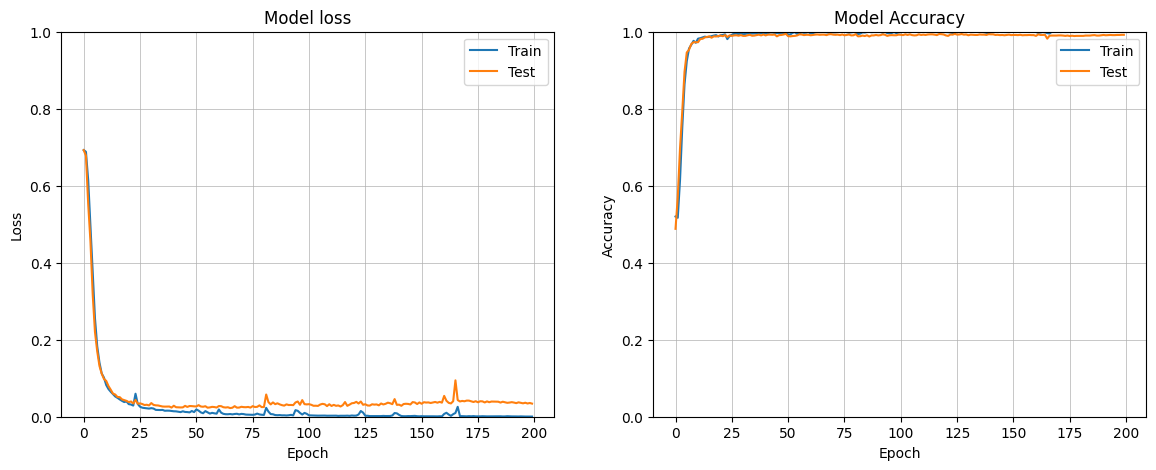

In [21]:
plot_loss_accuracy(r, title=None)

In [22]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [23]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 14ms/step - loss: 0.6949 - accuracy: 0.5208 - val_loss: 0.6941 - val_accuracy: 0.5140
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6950 - accuracy: 0.5132 - val_loss: 0.6953 - val_accuracy: 0.5084
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5080 - val_loss: 0.6952 - val_accuracy: 0.5068
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5196 - val_loss: 0.6952 - val_accuracy: 0.5084
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.5160
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5216 - val_loss: 0.6950 - val_accuracy: 0.5236
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5220 - val_loss: 0.6936 - val_accuracy: 0.5208
Epoch 8/200


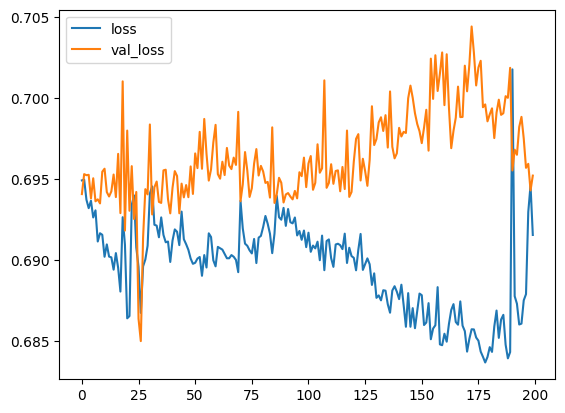

In [24]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [25]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 4s 21ms/step - loss: 0.6957 - accuracy: 0.4972 - val_loss: 0.6937 - val_accuracy: 0.5016
Epoch 2/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5116
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6936 - val_accuracy: 0.5172
Epoch 4/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5208 - val_loss: 0.6942 - val_accuracy: 0.5036
Epoch 5/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6921 - accuracy: 0.5136 - val_loss: 0.6939 - val_accuracy: 0.5084
Epoch 6/200
79/79 [==============================] - 2s 20ms/step - loss: 0.6926 - accuracy: 0.5212 - val_loss: 0.6940 - val_accuracy: 0.5056
Epoch 7/200
79/79 [==============================] - 2s 23ms/step - loss: 0.6917 - accuracy: 0.5220 - val_loss: 0.6942 - val_accuracy: 0.5084
Epoch 

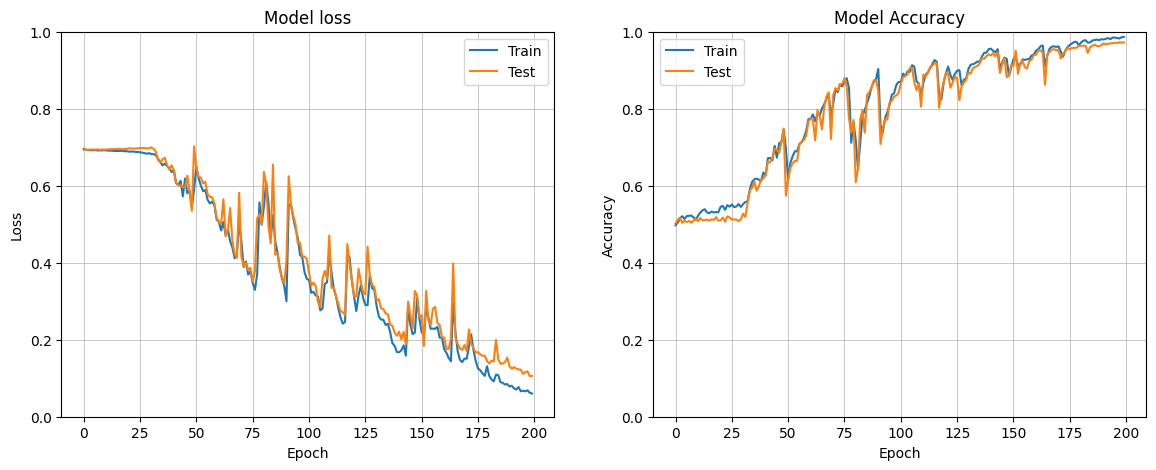

In [26]:
plot_loss_accuracy(r, title=None)

In [27]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 5s 23ms/step - loss: 0.6933 - accuracy: 0.5172 - val_loss: 0.6933 - val_accuracy: 0.5220
Epoch 2/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.5132 - val_loss: 0.6932 - val_accuracy: 0.5176
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6928 - accuracy: 0.5184 - val_loss: 0.6935 - val_accuracy: 0.5124
Epoch 4/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6926 - accuracy: 0.5148 - val_loss: 0.6932 - val_accuracy: 0.5164
Epoch 5/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.5084 - val_loss: 0.6940 - val_accuracy: 0.5064
Epoch 6/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6922 - accuracy: 0.5300 - val_loss: 0.6938 - val_accuracy: 0.5024
Epoch 7/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6923 - accuracy: 0.5256 - val_loss: 0.6936 - val_accuracy: 0.5248
Epoch 

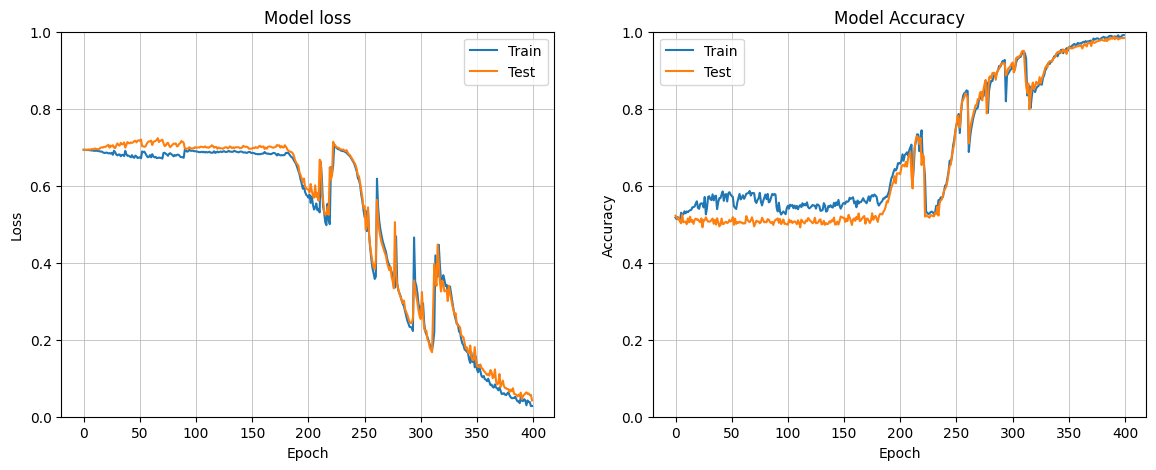

In [28]:
plot_loss_accuracy(r, title=None)

In [30]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [29]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 4s 22ms/step - loss: 0.6934 - accuracy: 0.5056 - val_loss: 0.6936 - val_accuracy: 0.5100
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5176 - val_loss: 0.6921 - val_accuracy: 0.5432
Epoch 3/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6914 - accuracy: 0.5340 - val_loss: 0.6894 - val_accuracy: 0.5340
Epoch 4/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6871 - accuracy: 0.5424 - val_loss: 0.6865 - val_accuracy: 0.5556
Epoch 5/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6807 - accuracy: 0.5560 - val_loss: 0.6759 - val_accuracy: 0.5704
Epoch 6/100
79/79 [==============================] - 2s 20ms/step - loss: 0.6652 - accuracy: 0.6092 - val_loss: 0.6501 - val_accuracy: 0.6180
Epoch 7/100
79/79 [==============================] - 2s 24ms/step - loss: 0.6393 - accuracy: 0.6392 - val_loss: 0.6368 - val_accuracy: 0.6352
Epoch 

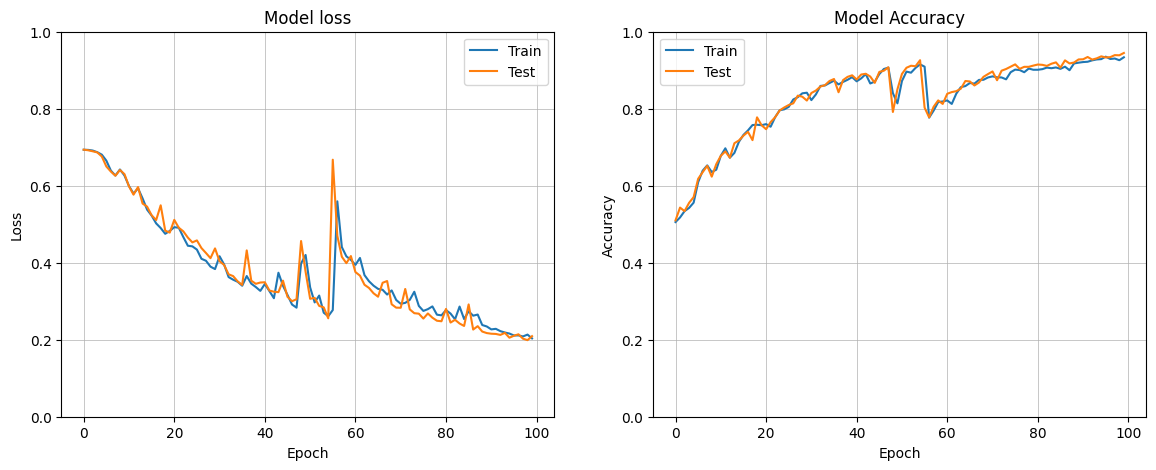

In [31]:
plot_loss_accuracy(r, title=None)